<a href="https://colab.research.google.com/github/AlbertoMontanelli/Machine-Learning/blob/neural_network/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cose da fare
* inserire documentazione per le regolarizzazioni, adam, momento e ricontrollare tutto (spiegare SOLO PER NOI perché la lasso favorisce i pesi che sono a 0 e porta a sparsity, mentre la ridge favorisce pesi piccoli ma non nulli e tiene di conto di tutti i pesi - meno sparsity)
* inserire loss function per problemi di classificazione: BCE o altro
* RICERCA DI IPERPARAMETRI -> GRID SEARCH
* analisi training error vs validation error vs test error
### Novelties
* inserire novelties sulla back-prop: quick-prop, R-prop
* early stopping
* learning rate variabile (?)
* standarditation e normalization (FACOLTATIVO FORSE)
# Cose da fare secondo le (!) Micheli
* **Try a number of random starting configurations** (e.g. 5-10 or more training runs or trials) -> una configurazione è nr di layers, nr unità per layer, inzializzazione pesi e bias (quindi togliere magari il seed). Useful for the project: take the mean results (mean of errors) and look to variance to evaluate your model and then, if you like to have only 1 response:  you can choose the solution giving lowest (penalized) validation error (or the median) or you can take advantage of different end points by an average (committee) response: mean of the outputs/voting

# Notation conventions
* **net** = $X \cdot W+b$, $\quad X$: input matrix, $\quad W$: weights matrix, $\quad b$: bias array;
* **number of examples** = $l$ ;
* **number of features** = $n$ ;
* **input_size** : for the layer $i$ -> $k_{i-1}$ : number of the units of the previous layer $i-1$ ;
* **outputz_size** : for the layer $i$ -> $k_{i}$ : number of the units of the current layer $i$;
* **output_value** : $o_i=f(net_i)$ for layer $i$, where $f$ is the activation function.
* **number of labels** = $d$ for each example -> $l \ \textrm{x}\ d$ matrix. \
dim(**labels**) = dim(**predictions**) = dim(**targets**).

### Input Layer $L_0$ with $k_0$ units :
* input_size = $n$;
* output_size = $k_0$;
* net = $X \cdot W +b$, $\quad X$ : $l \ \textrm{x} \ n$ matrix, $\quad W: n \ \textrm{x} \ k_0$ matrix, $\quad b = 1 \ \textrm{x} \ k_0$ array; \
$⇒$ net: $l \ \textrm{x} \ k_0$ matrix.

### Generic Layer $L_i$ with $k_i$ units :
* input_size = $k_{i-1}$ ;
* output_size = $k_i$ ;
* net = $X \cdot W+b$, $\quad X$ : $l \ \textrm{x} \ k_{i-1}$ matrix, $\quad W: k_{i-1} \ \textrm{x} \ k_i$ matrix, $\quad b = 1 \ \textrm{x} \ k_i$ array ; \
$⇒$ net : $l \ \textrm{x} \ k_i$ matrix .

### Online vs mini-batch version:
* online version: $l' = 1$ example;
* mini-batch version: $l' =$ number of examples in the mini-batch.

# Activation functions
Definition of the activation functions and their derivatives.
* **Hidden layers**:
  * **ReLU**: computationally efficient, resilient to vanishing gradient problem, suffers if net < 0;
  * **Leaky ReLU**: better than ReLU in case of convergence problems thanks to non null output for net < 0;
    * $0<$ alpha $<<1$: if alpha is too small, the gradient could be negligable;
  * **ELU**: same as Leaky ReLU, the best in term of performances but the worst in term of computational costs;
  * **tanh**: very useful if data are distributed around 0, but tends to saturate to -1 or +1 in other cases;
* **Output layer**:
  * **Regression problem**: Linear output;
  * **Binary classification**: Sigmoid, converts values to 0 or 1 via threshold while being differentiable in 0, unlike e.g. the sign function;

In [195]:
import numpy as np

def sigmoid(net):
    return 1 / (1 + np.exp(-net))

def d_sigmoid(net):
    return np.exp(-net) / (1 + np.exp(-net))**2

def tanh(net):
    return np.tanh(net)

def d_tanh(net):
    return 1 - (np.tanh(net))**2

"""   DA RIVEDERE

def softmax(net):
    return np.exp(net) / np.sum(np.exp(net), axis = 1, keepdims=True)

def softmax_derivative(net):

    # batch_size is the number of the rows in the matrix net; current_neuron_size is the number of the columns
    batch_size, current_neuron_size = net.shape

    # initialization of Jacobian tensor: each example in the batch (batch_size) is the input to current_neuron_size neurons,
    # for each neuron we compute current_neuron_size derivatives with respect to the other neurons and itself. This results in a
    # batch_size x current_neuron_size x current_neuron_size tensor.
    jacobians = np.zeros((batch_size, current_neuron_size, current_neuron_size))

    for i in range(batch_size): # for each example i in the batch
        s = net[i].reshape(-1, 1)  # creation of a column vector of dimension current_neuron_size x 1, s contains all the features of
                                   # the example i
        jacobians[i] = np.diagflat(s) - np.dot(s, s.T)

    return jacobians
"""

def softplus(net):
    return np.log(1 + np.exp(net))

def d_softplus(net):
    return np.exp(net) / (1 + np.exp(net))

def linear(net):
    return net

def d_linear(net):
    return 1

def ReLU(net):
    return np.maximum(net, 0)

def d_ReLU(net):
    return 1 if(net>=0) else 0

def leaky_relu(net, alpha):
    return np.maximum(net, alpha*net)

def d_leaky_relu(net, alpha):
    return 1 if(net>=0) else alpha

def ELU(net):
    return net if(net>=0) else np.exp(net)-1

def d_ELU(net):
    return 1 if(net>=0) else np.exp(net)

# np.vectorize returns an object that acts like pyfunc, but takes arrays as input
d_ReLU = np.vectorize(d_ReLU)
d_leaky_relu = np.vectorize(d_leaky_relu)
ELU = np.vectorize(ELU)
d_ELU = np.vectorize(d_ELU)


# Loss/Error functions:
Definition of loss/error functions and their derivatives. \
For each derivative we omit a minus from the computation because it's included later in the computation of the learning rule:
* **mean_squared_error**;
* **mean_euclidian_error**;
* **huber_loss**: used when there are expected big and small errors due to outliers or noisy data.

In [196]:
def mean_squared_error(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)

def d_mean_squared_error(y_true, y_pred):
    return - 2 * (y_true - y_pred)

def mean_euclidian_error(y_true, y_pred):
    return np.sqrt(np.sum((y_true - y_pred)**2))

def d_mean_euclidian_error(y_true, y_pred):
    return - (y_true - y_pred) / np.sqrt(np.sum((y_true - y_pred)**2))

def huber_loss(y_true, y_pred, delta):
    return 0.5 * (y_true - y_pred)**2 if(np.abs(y_true-y_pred)<=delta) else delta * np.abs(y_true - y_pred) - 0.5 * delta**2

def d_huber_loss(y_true, y_pred, delta):
    return - (y_true - y_pred) if(np.abs(y_true-y_pred)<=delta) else - delta * np.sign(y_true-y_pred)


#  class Layer
**Constructor parameters:**
 * input_size: $k_{i-1}$;
 * output_size: $k_i$;
 * activation_function;
 * activation_derivative.

**Constructor attributes:**
* self.input_size = input_size;
* self.output_size = output_size;
* self.activation_function;
* self.activation_derivative;
* self.initialize_weights(): initialize weights and biases recalling the method initialize_weights every time an istance of the class Layer is created.

**Methods :**

* **initialize_weights**: initialize weights and biases
  * attributes:
    * self.weights: $k_{i-1} \ \textrm{x} \ k_i$ matrix. Initialized extracting randomly from a uniform distribution [-1/a, 1/a], where a = $\sqrt{k_{i-1}}$;
    * self.biases: $1 \ \textrm{x} \ k_i$ array. Initialized to an array of zeros;
    
* **forward_layer**: allows to compute the output of the layer for a given input.
  * parameter:
    * input_array: matrix $X$ (see above for the case $L_0$ or $L_i$).
  * attributes:
    * self.input: input_array;
    * self.net: net matrix $X \cdot W + b$ (see above for the case $L_0$ or $L_i$).
  * return -> output = $f(net)$, where $f$ is the activation function. $f(net)$ has the same dimensions of $net$.
  
* **backward_layer**: computes the gradient loss and updates the weights by the learning rule for the single layer.
  * parameters:
    * d_Ep: target_value $-$ output_value, element by element: $l \ \textrm{x} \ d$ matrix.
    * learning_rate.
  * return -> sum_delta_weights $= \delta \cdot W^T$

In [197]:
class Layer:

    def __init__(self, input_size, output_size, activation_function, activation_derivative):
        self.input_size = input_size
        self.output_size = output_size
        self.activation_function = activation_function
        self.activation_derivative = activation_derivative
        self.initialize_weights()
        self.t = 1 # number of iterations for adam

    def initialize_weights(self):
        # Initialization of the parameters of the network
        self.weights = np.random.uniform(low=-1/np.sqrt(self.input_size), high=1/np.sqrt(self.input_size), size=(self.input_size, self.output_size))
        self.biases = np.zeros((1, self.output_size))

        # Initialization of the parameters for Nesterov optimization
        self.velocity_weights = np.zeros_like(self.weights) # zeros array with dim = dim(self.weights)
        self.velocity_biases = np.zeros_like(self.biases)

        # Initialization of the parameters for Adam optimization
        self.m_weights = np.zeros_like(self.weights)
        self.v_weights = np.zeros_like(self.weights)
        self.m_biases = np.zeros_like(self.biases)
        self.v_biases = np.zeros_like(self.biases)

    def forward_layer(self, input_array):
        self.input = input_array
        self.net = np.dot(self.input, self.weights) + self.biases
        output = self.activation_function(self.net)
        return output

    # Tikhonov, lasso, elastic regularization.
    def regularization_func(self, reg_type, Lambda_t, Lambda_l, ww):
        if reg_type == 'tikhonov':
            reg_term = 2 * Lambda_t * ww # learning rule of tikhonov regularization,
                                                   # the minus sign is due to the application of gradient descent algorithm.
                                                   # We use the predicted weights in the Nesterov optimization in the regularization too
        elif reg_type == 'lasso':
            reg_term = Lambda_l * np.sign(ww) # learning rule of lasso regularization
        elif reg_type == 'elastic':
            reg_term = (2 * Lambda_t * ww + Lambda_l * np.sign(ww)) # lasso + tikhonov regularization
        return reg_term

    def backward_layer(self, d_Ep, learning_rate_w, learning_rate_b, Lambda_t, Lambda_l, momentum, beta_1, beta_2, epsilon, reg_type, opt_type):
        self.delta = - d_Ep * self.activation_derivative(self.net)
        if opt_type == 'NAG':
            weights_pred = self.weights + momentum * self.velocity_weights  # predicted weights in order to use the Nesterov momentum,
                                                                            # used to evaluate the gradient after the momentum is applied
            bias_pred = self.biases + momentum * self.velocity_biases # same thing for the biases
            net_pred = np.dot(self.input, weights_pred) + bias_pred  #  Net has been computed with respect to the predicted weights and the predicted biases
            delta_pred = - d_Ep * self.activation_derivative(net_pred)  # Loss gradient with respect to net, minus sign due to the definition
            grad_weights = learning_rate_w * np.dot(self.input.T, delta_pred)  # Loss gradient multiplied by the learning rate.
                                                                            # The gradient has been computed with respect to the predicted weights and biases
            
            reg_term = self.regularization_func(reg_type, Lambda_t, Lambda_l, weights_pred)
            self.velocity_weights = momentum * self.velocity_weights + grad_weights - reg_term  # Delta w new 
            self.weights += self.velocity_weights  # Updating the weights
            self.velocity_biases = momentum * self.velocity_biases + learning_rate_b * np.sum(delta_pred, axis=0, keepdims=True)
            self.biases += self.velocity_biases # Updating the biases

        elif opt_type == 'adam':
            reg_term = self.regularization_func(reg_type, Lambda_t, Lambda_l, self.weights)
            self.m_weights = beta_1 * self.m_weights + (1 - beta_1) * (- np.dot(self.input.T, self.delta) - reg_term) # np.dot(self.input.T, delta) is dLoss/dw,
                                                                                                                        # since self.delta is defined with a minus sign
                                                                                                                        # and the formula is with a plus sign, we put a minus sign
                                                                                                                        # in front of np.dot(xxx)
            self.v_weights = beta_2* self.v_weights + (1 - beta_2) * ((- np.dot(self.input.T, self.delta) - reg_term)**2) # here we have a plus sign in front of (1 - beta_2) since
                                                                                                                        # self.delta is squared
            m_weights_hat = self.m_weights / (1 - beta_1**self.t)
            v_weights_hat = self.v_weights / (1 - beta_2**self.t)

            self.m_biases = beta_1 * self.m_biases - (1 - beta_1) * np.sum(self.delta, axis=0, keepdims=True)
            self.v_biases = beta_2* self.v_biases + (1 - beta_2) * np.sum(self.delta**2, axis=0, keepdims=True)
            m_biases_hat = self.m_biases / (1 - beta_1**self.t)
            v_biases_hat = self.v_biases / (1 - beta_2**self.t)

            self.weights -= learning_rate_w * m_weights_hat / (np.sqrt(v_weights_hat) + epsilon)
            self.biases -= learning_rate_b * m_biases_hat / (np.sqrt(v_biases_hat) + epsilon)

        sum_delta_weights = np.dot(self.delta, self.weights.T) # loss gradient for hidden layer
        return sum_delta_weights

# class NeuralNetwork
**Constructor attributes**:
 * self.layers: an empty list that will contain the layers.

**Methods**:

* **data_split**: splits the input data into two sets: training & validation set, test set.
   * parameters:
     * x_tot: total data given as input;
     * target: total data labels given as input;
     * test_split: percentile of test set with respect to the total data.
    * return->:
      * x_train_val: training & validation set extracted from input data;
      * target_train_val: training & validation set labels;
      * x_test_val: test set extracted from input data;
      * target_test_val: test set for input data labels.

     
* **add_layer**: appends a layer to the empty list self.layers
   * parameter:
     * layer: the layer appended to the list self.layers.

* **forward**: iterates the layer.forward_layer method through each layer in the list self.layers
  * parameter:
    * input: $X$ matrix for layer $L_0$, $o_{i-1}$ for layer $L_i$.
  * return -> input = $o_i$ for layer $L_i$.
  
* **backward**: iterates from the last layer to the first layer the layer.backward_layer method, thus updating the weights and the biases for each layer.
  * parameters:
    * d_Ep;
    * learning_rate.

* **reinitialize_weights**: re-initializes the weights layer-by-layer in case of need, e.g. with k-fold cross validation after each cycle.

* **train_val_setup**: stores the outputs of training and validation into arrays (retrieved by the iteration of forward propagation + backpropagation), computes the training loss and the validation error.
  * parameters:
    * x_train: set of the original dataset used for training;
    * target_train: labels corresponding to the training set;
    * x_val: set of the original dataset used for validation;
    * target_val: labels corresponding to the validation set;
    * epochs: number of iterations of the forward propagation + backpropagation algorithms; hyperparameter;
    * learning_rate: determines the step size of the learning algorithm. Warning: has to be tuned keeping in mind gradient explosion, unsmoothness of the learning rate, velocity of the convergence, etc...; hyperparameter;
    * loss_function: hyperparameter;
    * loss_function_derivative: hyperparameter;
    * batch_size: number of examples included in each batch. If batch_size = 1 the **online algorithm** is applied (data is processed example-by-example), else the **mini-batch algorithm** is applied with batches of size batch_size; hyperparameter.

* **train_val**: actual training and validation process.
  * parameters:
    * x_train_val;
    * target_train_val;
    * K: number of splits of the training & validation set. If K = 1 validation is performed as hold-out validation, else K is the number of folds in the K-fold cross validation; hyperparameter;
    * epochs;
    * learning_rate;
    * loss_function;
    * loss_function_derivative;
    * batch_size.



In [198]:
class NeuralNetwork:

    def __init__(self):
        self.layers = []

    def data_split(self, x_tot, target, test_split):
        num_samples = x_tot.shape[0] # the total number of the examples in input = the number of rows in the x_tot matrix
        test_size = int(num_samples * test_split) # the number of the examples in the test set

        x_test = x_tot[:test_size]
        target_test = target[:test_size]
        x_train_val = x_tot[test_size:]
        target_train_val = target[test_size:]

        return x_train_val, target_train_val, x_test, target_test

    def add_layer(self, layer):
        self.layers.append(layer)

    def forward(self, input):
        for layer in self.layers:
            input = layer.forward_layer(input)
        return input

    def backward(self, d_Ep, learning_rate_w, learning_rate_b, Lambda_t, Lambda_l, momentum, beta_1, beta_2, epsilon, reg_type, opt_type):
        for layer in reversed(self.layers):
            d_Ep = layer.backward_layer(d_Ep, learning_rate_w, learning_rate_b, Lambda_t, Lambda_l, momentum, beta_1, beta_2, epsilon, reg_type, opt_type)

    def reinitialize_weights(self):
        for layer in self.layers:
            layer.initialize_weights() # does it layer-by-layer

    def train_val_setup(self, x_train, target_train, x_val, target_val, epochs, learning_rate_w, learning_rate_b, Lambda_t, Lambda_l, momentum, batch_size, beta_1, beta_2, epsilon, loss_function, loss_function_derivative, reg_type, opt_type):
        train_error_epoch = np.zeros(epochs)
        val_error_epoch = np.zeros(epochs)

        for epoch in range(epochs):
            epoch_tr_loss = 0 # initialization of the training loss; errors will be added epoch-by-epoch
            epoch_val_loss = 0

            # shuffling training data before splitting it into batches.
            # done in order to avoid reinforcing neurons in the same way
            # in different epochs due to invisible patterns in the data
            train_indices = np.arange(x_train.shape[0])
            np.random.shuffle(train_indices)
            x_train = x_train[train_indices] # PROVARE SE VIENE SHUFFOLATO LO SHUFFOLATO O SE VIENE SHUFFOLATO OGNI VOLTA L'ORIGINALE
            target_train = target_train[train_indices]

            # if batch_size=1 we get the online version,
            # else we get mini-batch version with batches of size batch_size
            for i in range(0, x_train.shape[0], batch_size): # the step of the for cycle is batch_size.
                                                             # Even if the number of examples is not divisible
                                                             # for batch_size the last, smaller batch is processed anyway

                x_batch = x_train[i:i+batch_size]
                target_batch = target_train[i:i+batch_size]

                # forward propagation
                predictions = self.forward(x_batch) # calculates the output of the training data
                # computing loss and gradient
                loss = loss_function(target_batch, predictions)
                loss_gradient = loss_function_derivative(target_batch, predictions)
                epoch_tr_loss += np.sum(loss)

                # Backward pass
                self.backward(loss_gradient, learning_rate_w, learning_rate_b, Lambda_t, Lambda_l, momentum, beta_1, beta_2, epsilon, reg_type, opt_type)
                Layer.t += 1 # number of iterations for adam

            # validation
            val_predictions = self.forward(x_val) # calculates the output of the validation date
            val_loss = loss_function(target_val, val_predictions)
            epoch_val_loss = np.mean(val_loss) # the validation error is computed on all validation set after the training is finished.
                                               # the computation of the validation error at the end of the epoch is the standard for all NN
            # Store average errors for the epoch
            train_error_epoch[epoch] = epoch_tr_loss / x_train.shape[0]
            val_error_epoch[epoch] = epoch_val_loss

        return train_error_epoch, val_error_epoch


    def train_val(self, x_train_val, target_train_val, train_split, K, epochs, learning_rate_w, learning_rate_b, Lambda_t, Lambda_l, momentum, batch_size, beta_1, beta_2, epsilon, loss_function, loss_function_derivative, reg_type, opt_type):
        num_samples = x_train_val.shape[0]
        fold_size = num_samples // K

        # error storage for averaging
        avg_train_error_epoch = np.zeros(epochs)
        avg_val_error_epoch = np.zeros(epochs)

        if K==1: # hold-out validation
            train_indices = np.arange(0, int(train_split*num_samples)) # training set is 75% of the training & validation set
            val_indices = np.setdiff1d(np.arange(num_samples), train_indices) # setdiff1d is the set difference between the first and the second set
            x_train, target_train = x_train_val[train_indices], target_train_val[train_indices] # definition of training set with matching targets
            x_val, target_val = x_train_val[val_indices], target_train_val[val_indices] # definition of validation set with matching targets
            train_error_epoch, val_error_epoch = self.train_val_setup(
            x_train, target_train, x_val, target_val, epochs, learning_rate_w, learning_rate_b, Lambda_t, Lambda_l, momentum, batch_size, beta_1, beta_2, epsilon, loss_function, loss_function_derivative, reg_type, opt_type
            ) # computation of errors via train_val_setup method
            return train_error_epoch, val_error_epoch

        for k in range(K):
            # creating fold indices
            val_indices = np.arange(k * fold_size, (k + 1) * fold_size) # creation of an array of indices with len = fold_size.
                                                                        # It contains the indices of the examples used in validation set for
                                                                        # this fold.
            train_indices = np.setdiff1d(np.arange(num_samples), val_indices) # creation of an array of indices with len = num_samples -
                                                                              # len(val_indices). It contains the indices of all the examples
                                                                              # but the ones used in the validation set for this fold.
                                                                              # It corresponds to the training set for the current fold.
            x_train, target_train = x_train_val[train_indices], target_train_val[train_indices]
            x_val, target_val = x_train_val[val_indices], target_train_val[val_indices]

            # re-initializing weights for each fold
            self.reinitialize_weights()
            Layer.t = 1
            # training on the current fold
            train_error_epoch, val_error_epoch = self.train_val_setup(
            x_train, target_train, x_val, target_val, epochs, learning_rate_w, learning_rate_b, Lambda_t, Lambda_l, momentum, batch_size, beta_1, beta_2, epsilon, loss_function, loss_function_derivative, reg_type, opt_type
            )

            # accumulating errors for averaging, we have the errors for each epoch summed for all the folds
            avg_train_error_epoch += train_error_epoch
            avg_val_error_epoch += val_error_epoch
            print(f"Fold {k+1} completed, t = {Layer.t}")

        # averaging errors across all folds
        avg_train_error_epoch /= K
        avg_val_error_epoch /= K

        for epoch in range(epochs):
            print(f"Epoch {epoch + 1}/{epochs}, Avg Training Loss: {train_error_epoch[epoch]}, Avg Validation Loss: {val_error_epoch[epoch]}")

        return avg_train_error_epoch, avg_val_error_epoch


# Unit Test

Fold 1 completed, t = 7001
Fold 2 completed, t = 7001
Fold 3 completed, t = 7001
Fold 4 completed, t = 7001
Fold 5 completed, t = 7001
Epoch 1/1000, Avg Training Loss: 0.8668432244584338, Avg Validation Loss: 120.92871596900068
Epoch 2/1000, Avg Training Loss: 0.7432315649003642, Avg Validation Loss: 102.24496477892822
Epoch 3/1000, Avg Training Loss: 0.6353073128006742, Avg Validation Loss: 88.34160264322091
Epoch 4/1000, Avg Training Loss: 0.5572952778692082, Avg Validation Loss: 78.85805233607337
Epoch 5/1000, Avg Training Loss: 0.5055004275364976, Avg Validation Loss: 72.85154402991304
Epoch 6/1000, Avg Training Loss: 0.47241562582545715, Avg Validation Loss: 69.36874446174869
Epoch 7/1000, Avg Training Loss: 0.45362689158344294, Avg Validation Loss: 67.30702507294858
Epoch 8/1000, Avg Training Loss: 0.4432738592581468, Avg Validation Loss: 66.56168952233648
Epoch 9/1000, Avg Training Loss: 0.44006066510988917, Avg Validation Loss: 66.16337457577377
Epoch 10/1000, Avg Training Loss

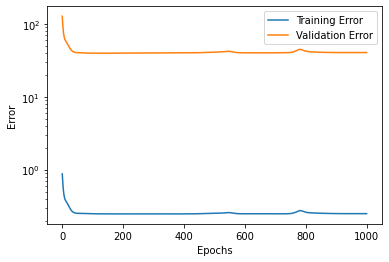

In [199]:
#test
np.random.seed(42)

x_tot = np.random.rand(1000, 15)
target = np.random.rand(1000, 3)

test_split = 0.2
train_split = 0.75

layer_one = Layer(15, 8, ELU, d_ELU)
layer_two = Layer(8, 5, ELU, d_ELU)
layer_out = Layer(5, 3, linear, d_linear)

NN = NeuralNetwork()

# Split data
x_train_val, target_train_val, x_test, target_test = NN.data_split(x_tot, target, test_split)

NN.add_layer(layer_one)
NN.add_layer(layer_two)
NN.add_layer(layer_out)

# Parametri di training
K = 5
epochs = 1000
learning_rate_w = 0.0005 # online smaller learning_rate, minibatch greater learning_rate, to compare online vs minibatch we need to divide
                         # learning_rate of minibatch for number of the examples in the minibatch
learning_rate_b = 0.0005
batch_size = 100
Lambda_t = 0.1
Lambda_l = 0.1
momentum = 0.9 # tipically from 0.8 and 0.99
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-8

# Cross-validation
train_error, val_error = NN.train_val(x_train_val, target_train_val, train_split, K, epochs, learning_rate_w, learning_rate_b, Lambda_t, Lambda_l, momentum, batch_size, beta_1, beta_2, epsilon, mean_squared_error, d_mean_squared_error, 'elastic', 'adam')

# Plot degli errori
import matplotlib.pyplot as plt

plt.plot(train_error, label='Training Error')
plt.plot(val_error, label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.yscale('log')
plt.legend()
plt.show()
